In [54]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from dtw import dtw_allign
import soundfile as sf
import IPython
from sklearn.decomposition import PCA

In [55]:
def display_melspect(y, sr):
    spec = np.abs(librosa.stft(y, hop_length=512))
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    mel_spectdB = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spectdB, y_axis='mel', fmax=8000, x_axis='time');
    plt.title('Mel Spectrogram');
    plt.colorbar(format='%+2.0f dB');
    return mel_spect

Time:- 7.0 
Shape of MelSpect:- (128, 151)


/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


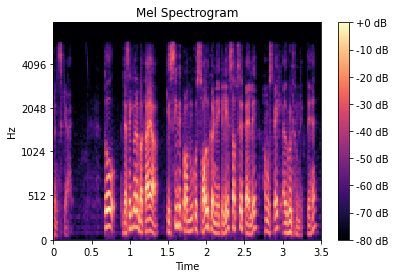

In [56]:
#Original track

ref_data, ref_sr = librosa.load('hindi3.wav')
ref_t = len(ref_data)/ref_sr

ref_melspect = display_melspect(ref_data, ref_sr)
print('Time:-', ref_t, '\nShape of MelSpect:-', ref_melspect.shape)

IPython.display.Audio('hindi3.wav')

Time:- 8.1 
Shape of MelSpect:- (128, 175)


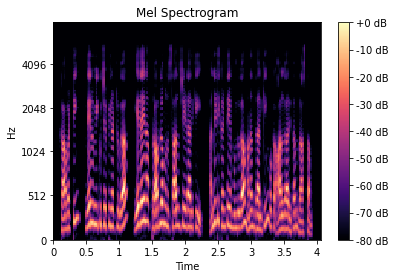

In [57]:
#Synthesized track

que_data, que_sr = librosa.load('telugu3_old.wav')
que_t = len(que_data)/que_sr

que_melspect = display_melspect(que_data, que_sr)
print('Time:-', que_t, '\nShape of MelSpect:-', que_melspect.shape)

IPython.display.Audio('telugu3_old.wav')


In [58]:
def melspect_allign(reference, input):
    output = []
    for i in range(reference.shape[0]):
        x = 1#np.mean(ref_melspect)/np.mean(que_melspect)
        res = dtw_allign(ref_melspect[i,:], x*que_melspect[i,:])
        tarallign = []
        for i in res:
            tarallign.append(que_melspect[0, int(i)])
        output.append(tarallign)
    output = np.matrix(output)
    return output

In [59]:
alligned_audio_melspec = melspect_allign(ref_melspect, que_melspect)

In [60]:
def display_melspect(data):
    mel_spectdB = librosa.power_to_db(data, ref=np.max)
    plt.figure()
    librosa.display.specshow(mel_spectdB, y_axis='mel', fmax=8000, x_axis='time');
    plt.title('Mel Spectrogram');
    plt.colorbar(format='%+2.0f dB');

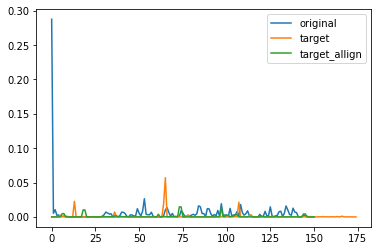

In [61]:
x = 1

plt.plot(ref_melspect[x,:], label='original')
plt.plot(que_melspect[x,:], label='target')
plt.plot(alligned_audio_melspec[x,:].T, label='target_allign')
plt.legend()

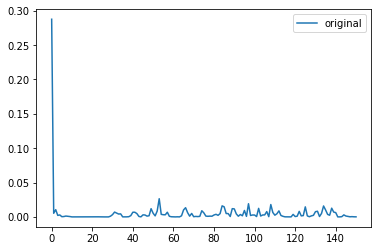

In [62]:
plt.plot(ref_melspect[x,:], label='original')

#plt.ylim((0, 0.04))
plt.legend()

In [63]:
pca = PCA(n_components=1)
que_melspectt = pca.fit_transform(que_melspect.T).T

In [64]:
pca1 = PCA(n_components=1)
ref_melspectt = pca1.fit_transform(ref_melspect.T).T

(1, 151)
(1, 175)


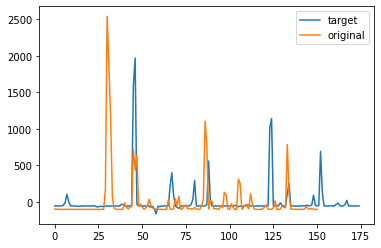

In [65]:
print(ref_melspectt.shape)
print(que_melspectt.shape)
plt.plot(que_melspectt.T, label='target')
plt.plot(ref_melspectt.T, label='original')
plt.legend()

In [66]:
path = dtw_allign(ref_melspectt.T, que_melspectt.T)

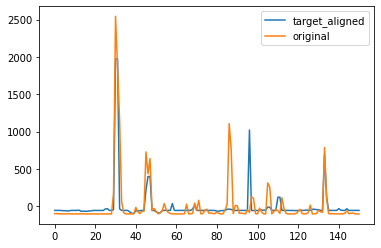

In [67]:
plt.plot(que_melspectt[0,path], label='target_aligned')
plt.plot(ref_melspectt.T, label='original')
plt.legend()

/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


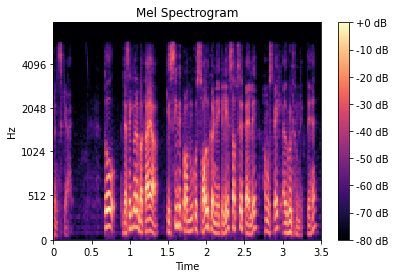

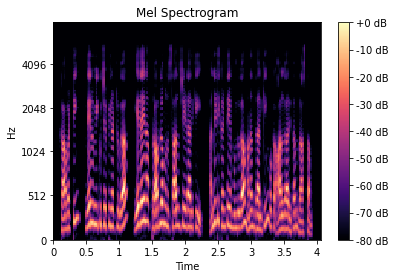

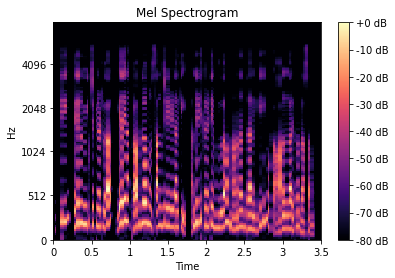

In [68]:
display_melspect(ref_melspect)
display_melspect(que_melspect)
display_melspect(que_melspect[:,path])

In [69]:
aligned_audio = librosa.feature.inverse.mel_to_audio(que_melspect[:,path], sr=que_sr,n_fft=2048, hop_length=1024)

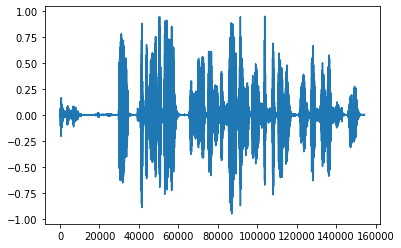

In [70]:
plt.plot(ref_data)

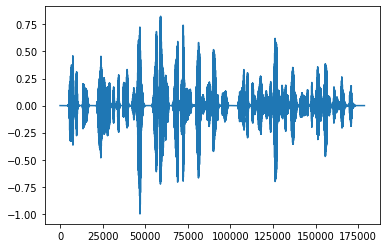

In [71]:
plt.plot(que_data)

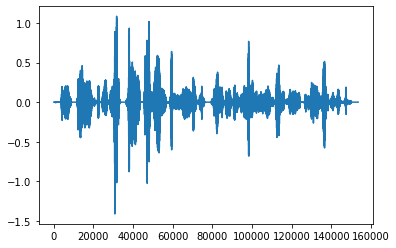

In [72]:
plt.plot(aligned_audio)

In [73]:
sf.write('telugu_aligned.wav', aligned_audio, que_sr)